In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TSML

In [2]:
def dertanh(X):
    return 1-np.power(np.tanh(X),2)

In [3]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

In [4]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [5]:
data=np.random.randn(2000,2)
data2=(25./100.)*np.random.randn(1000,2)
data3=2.1*np.random.randn(3000,2)
data4=6.5*np.random.randn(4000,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.5)])
circle2=np.array(data2)
circle3=np.array([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])
circle4=np.array([[x[0],x[1]] for x in data4 if (np.sqrt(x[0]**2+x[1]**2)>11.50)])
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))
data4=np.hstack((circle4,3*np.ones((circle4.shape[0],1))))
X=np.vstack((data,data2,data3,data4))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [6]:
colors=["red","blue","green", "purple"]

In [7]:
y

array([[0.],
       [2.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

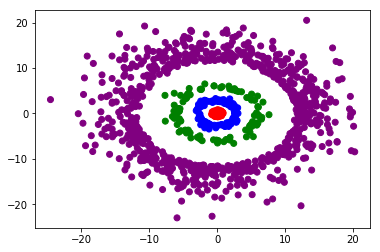

In [8]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[y.astype(int).reshape(-1)])

In [9]:
#Make this unecessarily complicated, hopefully to prove the point
layers=10
nodes=[10]*layers+[4]
activs=[np.tanh]*layers+[softmax]
deracts=[dertanh]*layers

In [42]:
model=TSML.MomentumNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

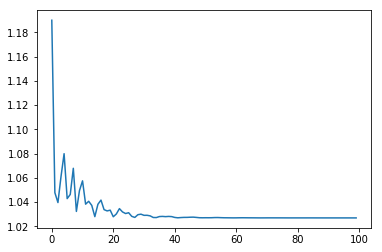

In [43]:
model.train(X,y,100,5e-4,.9, decay="Scheduled",k=.8,T=1000)
plt.plot(range(len(model.error)),model.error)

In [44]:
model.predict(X)

In [45]:
(model.predictions==y).mean()*100

50.63291139240506

In [46]:
weights=model.weights
biases=model.biases
delw=model.delw
delb=model.delb

In [60]:
model=TSML.MomentumNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

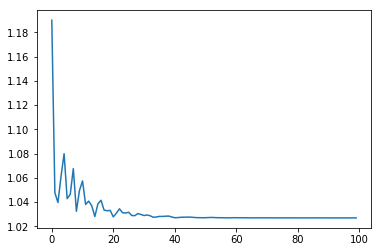

In [61]:
model.train(X,y,100,5e-4,.9, decay="Inverse",k=.0001)
plt.plot(range(len(model.error)),model.error)

In [70]:
model=TSML.MomentumNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

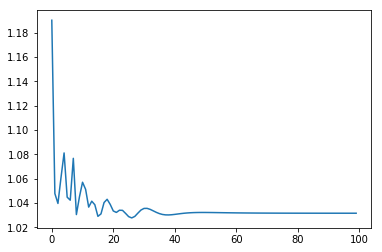

In [71]:
model.train(X,y,100,5e-4,0.9, decay="Exponential",k=.005)
plt.plot(range(len(model.error)),model.error)

In [19]:
model=TSML.MomentumNeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

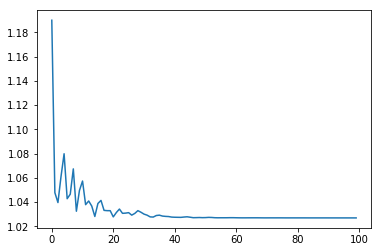

In [20]:
model.train(X,y,100,5e-4,.9)
plt.plot(range(len(model.error)),model.error)